<a href="https://colab.research.google.com/github/arogya-gyawali/brainscan_AI/blob/main/notebooks/data_exploration/visualize_matlab_mri_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ⚠️ **Note:** This notebook loads MRI brain tumor data directly from **Google Drive**, which means:
> - It won't run unless the user mounts their own Google Drive
> - The dataset path used here is: `/content/drive/MyDrive/BrainScanAI/figshare_raw_matlab`
>
> If you're trying to run this notebook:
> - Replace the dataset path with your own local path or upload `.mat` files manually
> - Or use [this dataset](https://figshare.com/articles/dataset/brain_tumor_dataset/1512427) to recreate the folder structure


# 🧠 Visualize Tumor Data from .mat Files

This notebook loads and visualizes MRI brain scan slices from the original Figshare dataset (`.mat` format). Each sample shows:

- The raw grayscale MRI image
- The tumor border (if present) in red
- The tumor mask (segmentation) overlaid in red

### 🧪 Purpose

This visualization step helps:
- Manually verify alignment of border/mask with the tumor region
- Understand variation across tumor types
- Quickly debug faulty/malformed `.mat` files

### 🔍 Output
Displays visual comparisons for 1 random sample and 5 random slices in a grid.

You can rerun this notebook to explore different random samples each time.


In [105]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import random


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


📄 Loading file: 804.mat


<ipython-input-145-351526c0f264>:53: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


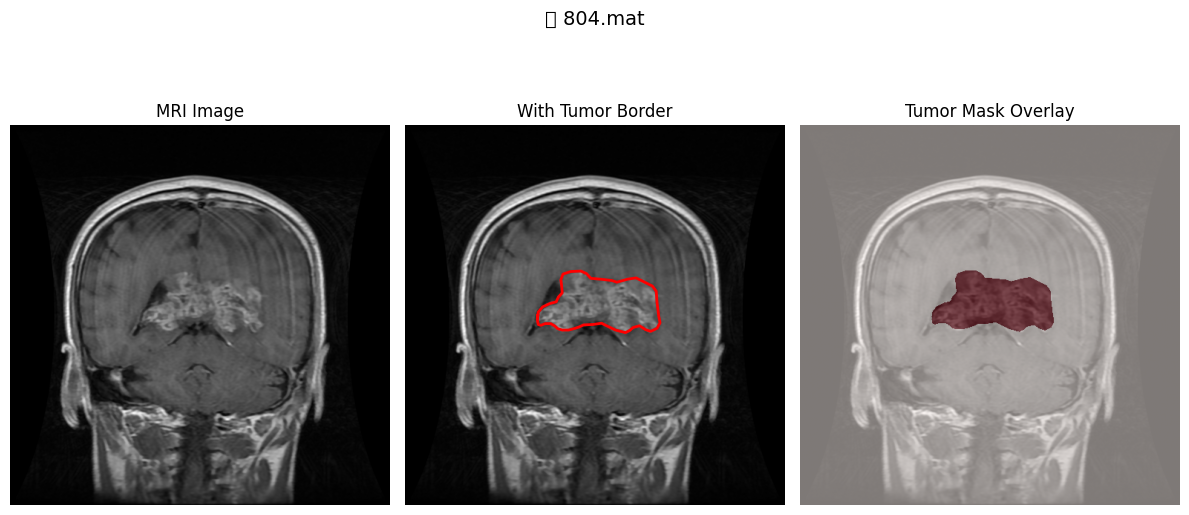

In [145]:
# Define the path to the .mat files
mat_folder = "/content/drive/MyDrive/BrainScanAI/figshare_raw_matlab"

# Filter only .mat files
mat_files = [f for f in os.listdir(mat_folder) if f.endswith(".mat")]

# --- Load one random .mat file ---
random_file = random.choice(mat_files)
print(f"📄 Loading file: {random_file}")
file_path = os.path.join(mat_folder, random_file)

with h5py.File(file_path, 'r') as f:
    cjdata = f['cjdata']

    # --- Image data ---
    image = np.array(cjdata['image']).T  # Transpose for correct orientation

    # --- Tumor mask ---
    tumor_mask = np.array(cjdata['tumorMask']).T

    # --- Tumor border ---
    border_data = np.array(cjdata['tumorBorder'])
    flat_border = border_data.flatten()
    tumor_border = flat_border.reshape(-1, 2)

# --- Plot ---
plt.figure(figsize=(12, 6))

# Original MRI
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("MRI Image")
plt.axis('off')

# With Border
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
if tumor_border.shape[1] == 2:
    plt.plot(tumor_border[:, 0], tumor_border[:, 1], color='red', linewidth=2)
else:
    print("⚠️ Tumor border not valid")
plt.title("With Tumor Border")
plt.axis('off')

# Tumor Mask
plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.imshow(tumor_mask, cmap='Reds', alpha=0.5)
plt.title("Tumor Mask Overlay")
plt.axis('off')

plt.suptitle(f"🧠 {random_file}", fontsize=14)
plt.tight_layout()
plt.show()

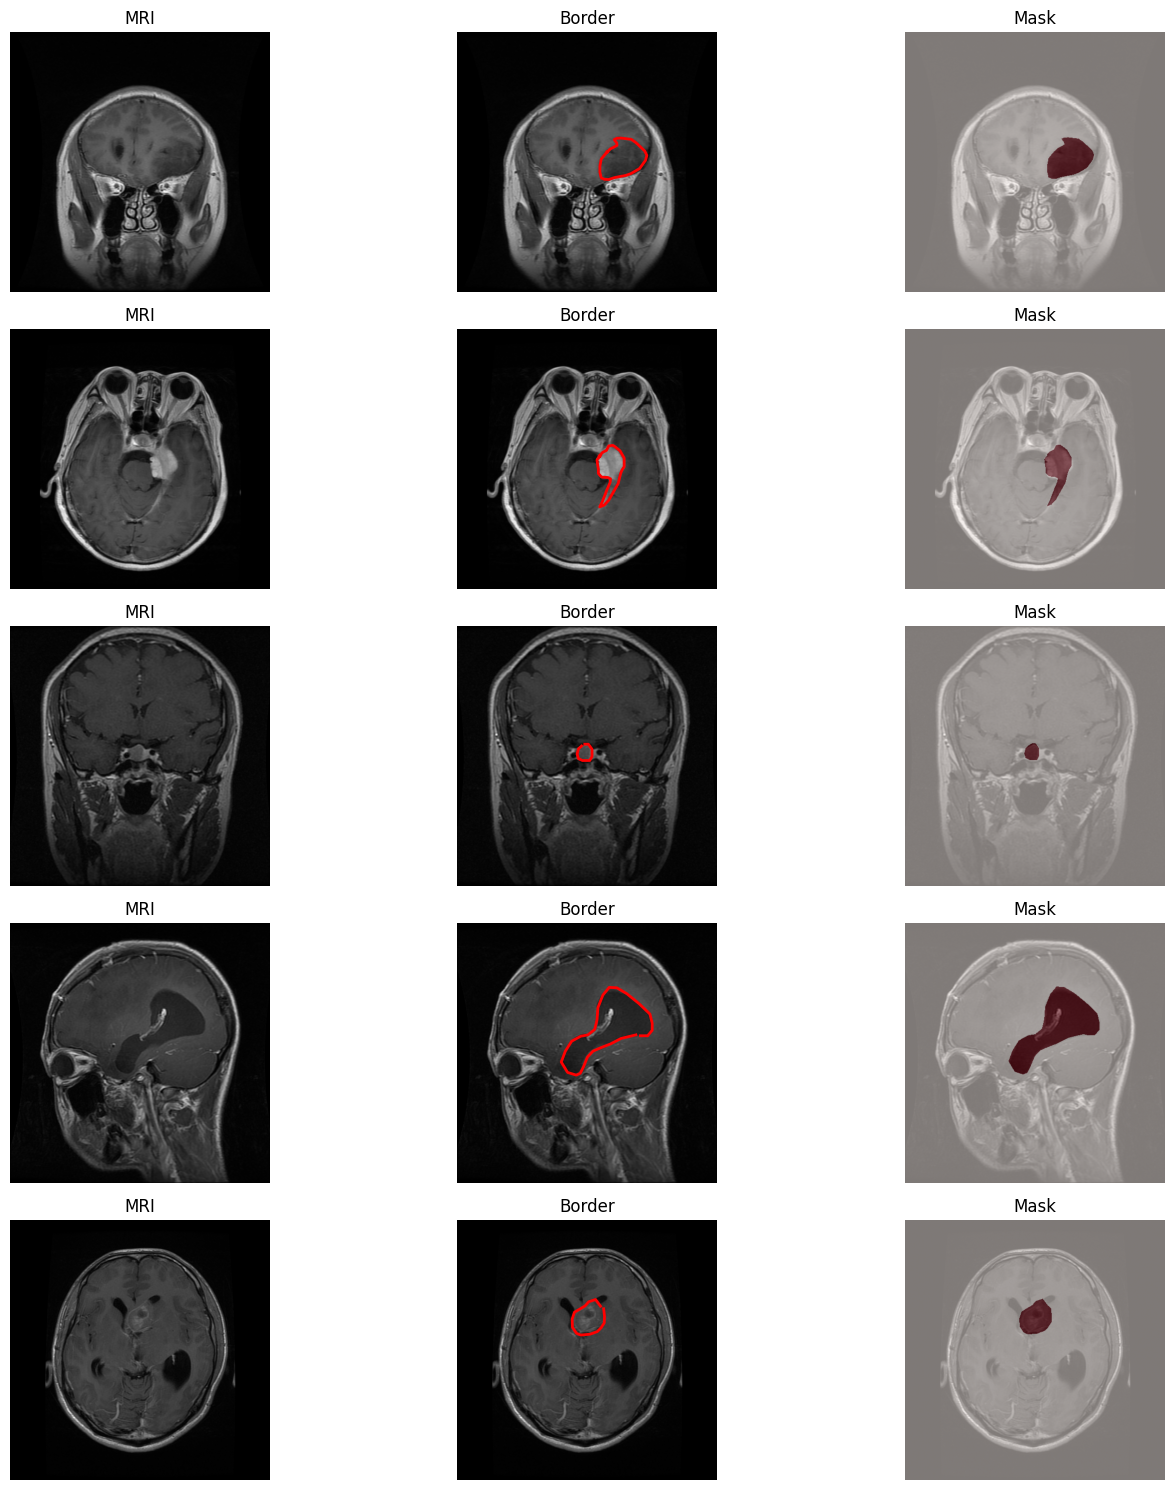

In [146]:
# Number of samples to show
num_samples = 5
random_files = random.sample(mat_files, num_samples)

plt.figure(figsize=(15, 3 * num_samples))

for idx, file_name in enumerate(random_files):
    file_path = os.path.join(mat_folder, file_name)

    try:
        with h5py.File(file_path, 'r') as f:
            cjdata = f['cjdata']
            image = np.array(cjdata['image']).T
            tumor_mask = np.array(cjdata['tumorMask']).T

            border_data = np.array(cjdata['tumorBorder'])
            flat_border = border_data.flatten()
            tumor_border = flat_border.reshape(-1, 2)

        # Plot
        plt.subplot(num_samples, 3, idx * 3 + 1)
        plt.imshow(image, cmap='gray')
        plt.title("MRI")
        plt.axis('off')

        plt.subplot(num_samples, 3, idx * 3 + 2)
        plt.imshow(image, cmap='gray')
        if tumor_border.shape[1] == 2:
            plt.plot(tumor_border[:, 0], tumor_border[:, 1], color='red', linewidth=2)
        plt.title("Border")
        plt.axis('off')

        plt.subplot(num_samples, 3, idx * 3 + 3)
        plt.imshow(image, cmap='gray')
        plt.imshow(tumor_mask, cmap='Reds', alpha=0.5)
        plt.title("Mask")
        plt.axis('off')

    except Exception as e:
        print(f"❌ Error with {file_name}: {e}")

plt.tight_layout()
plt.show()
